In [27]:
n_cores = -1

In [28]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [29]:
data = np.load('inga_out_real.npz')

In [30]:
mass = data['arr_0']
mass

array([ 1728.7834  ,   585.08972 ,   987.533777, ...,   804.142317,
        1199.5382  ,   822.3695  ])

In [31]:
name = data['arr_1']
name

array(['Inga_compound_2296', 'Inga_compound_2295', 'Inga_compound_2293',
       ..., 'Inga_compound_680', 'Inga_compound_683', 'Inga_compound_682'], dtype=object)

In [32]:
massabund = data['arr_2']
massabund

array([[  101.02479 ,   261.491486],
       [  113.01255 ,   452.270844],
       [  131.05072 ,   853.831665],
       ..., 
       [ 1043.54329 ,  7221.587402],
       [ 1044.54175 ,  4412.675781],
       [ 1045.56151 ,  1325.811462]])

In [33]:
blockind = data['arr_3']
blockind

array([   131,    131,    131, ..., 220753, 220753, 220753], dtype=uint32)

In [34]:
values = massabund[:,0]
values.shape

(53508,)

In [35]:
values_sorted = np.sort(values)
values_sorted.shape

(53508,)

### Plotting Splitting

In [36]:
def recurSplitting(arr, res, threshold):
    """
    A recursive method to split values into groups until 
    within each group there are no two consecutive values
    which have differences larger than the given threshold.
    """
    if threshold <= 0:
        raise ValueError('Threshold should be positive.')
    
    n = len(arr)
    maxInterval = -1
    maxIdx = -1
    for i in range(1,n):
        diff = arr[i] - arr[i-1]
        if diff > maxInterval:
            maxInterval = diff
            maxIdx = i
            
    if maxInterval < threshold:
        return
    else:
        res.append((arr[maxIdx-1]+arr[maxIdx])/2)
        arr1 = arr[0:maxIdx]
        recurSplitting(arr1, res, threshold)
        arr2 = arr[maxIdx:n]
        recurSplitting(arr2, res, threshold)

In [37]:
def splittingPlot(values, threshold):
    """
    Using splitting strategy to generate matrix.
    """
    splits = []
    recurSplitting(values, splits, threshold)
    splits.sort()
    mi_value = np.array(splits)
    print('number of groups: {}'.format(mi_value.size))
    
    plt.figure(figsize=(20,2))
    plt.plot(values, np.random.random(values.shape[0]), '+k')
    for s in mi_value:
        plt.axvline(x=s)
    plt.show()

### masses $\in [50,80]$

number of groups: 43


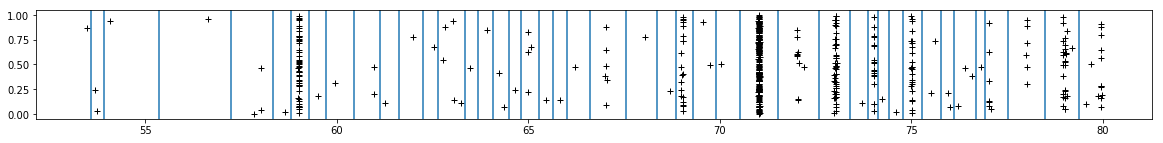

In [38]:
selected_values = values_sorted[(values_sorted>50) & (values_sorted<=80)]
splittingPlot(selected_values, 0.2)

number of groups: 55


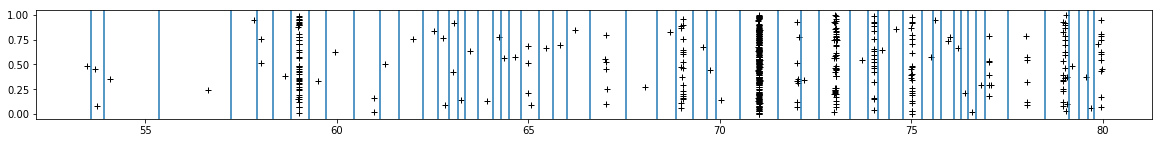

In [13]:
selected_values = values_sorted[(values_sorted>50) & (values_sorted<=80)]
splittingPlot(selected_values, 0.1)

number of groups: 60


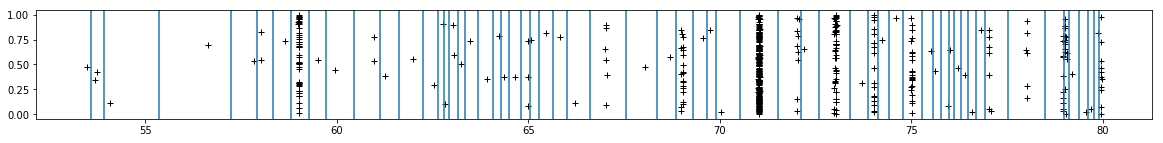

In [14]:
selected_values = values_sorted[(values_sorted>50) & (values_sorted<=80)]
splittingPlot(selected_values, 0.05)

### masses $\in [500,530]$

number of groups: 36


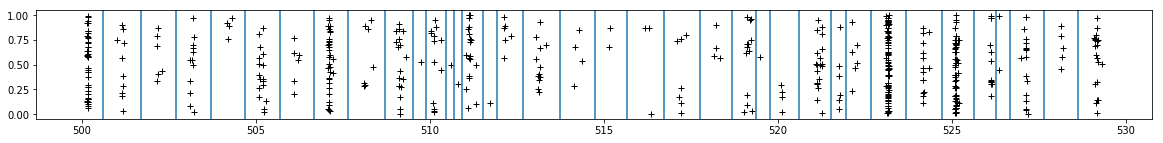

In [39]:
selected_values = values_sorted[(values_sorted>500) & (values_sorted<=530)]
splittingPlot(selected_values, 0.2)

number of groups: 47


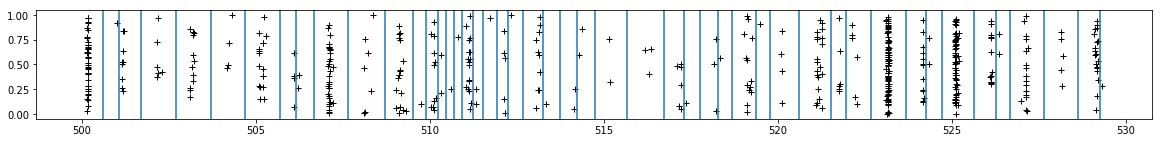

In [16]:
selected_values = values_sorted[(values_sorted>500) & (values_sorted<=530)]
splittingPlot(selected_values, 0.1)

number of groups: 71


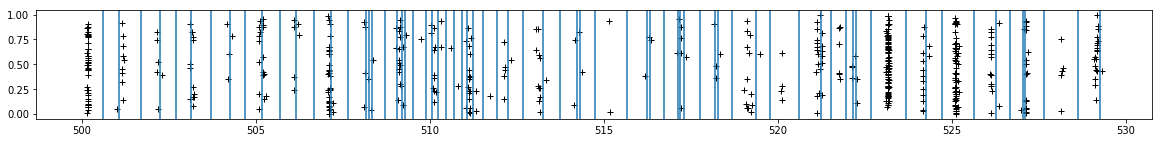

In [17]:
selected_values = values_sorted[(values_sorted>500) & (values_sorted<=530)]
splittingPlot(selected_values, 0.05)

### masses $\in [1000,1030]$

number of groups: 46


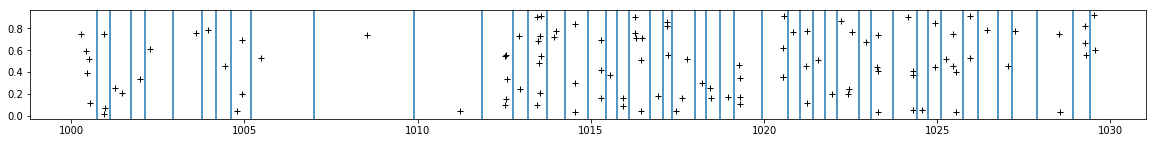

In [40]:
selected_values = values_sorted[(values_sorted>1000) & (values_sorted<=1030)]
splittingPlot(selected_values, 0.2)

number of groups: 56


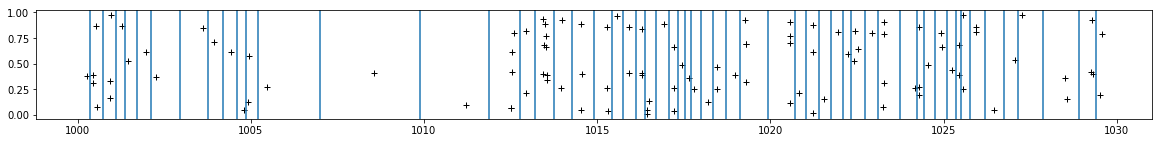

In [19]:
selected_values = values_sorted[(values_sorted>1000) & (values_sorted<=1030)]
splittingPlot(selected_values, 0.1)

number of groups: 58


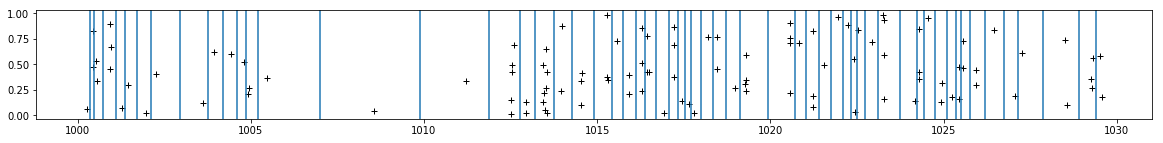

In [20]:
selected_values = values_sorted[(values_sorted>1000) & (values_sorted<=1030)]
splittingPlot(selected_values, 0.05)

### masses $\in [1500,1530]$

number of groups: 30


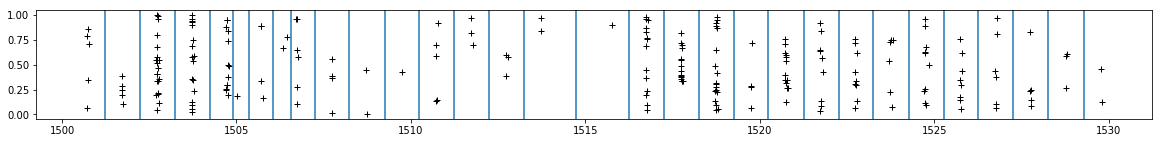

In [41]:
selected_values = values_sorted[(values_sorted>1500) & (values_sorted<=1530)]
splittingPlot(selected_values, 0.2)

number of groups: 30


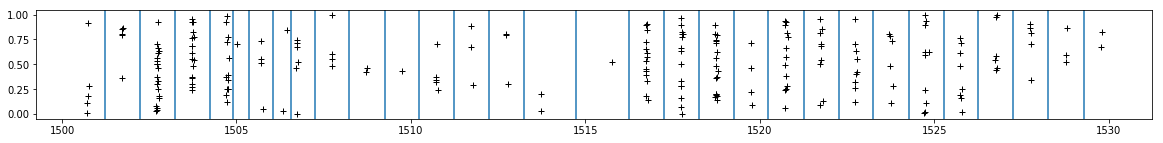

In [22]:
selected_values = values_sorted[(values_sorted>1500) & (values_sorted<=1530)]
splittingPlot(selected_values, 0.1)

number of groups: 33


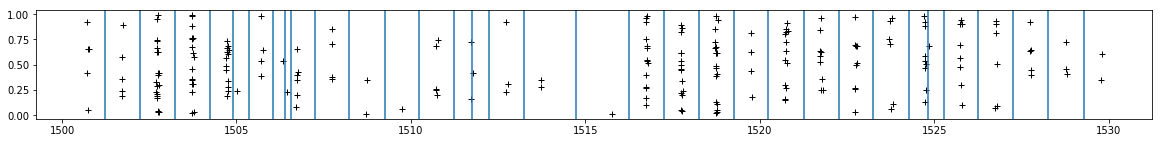

In [23]:
selected_values = values_sorted[(values_sorted>1500) & (values_sorted<=1530)]
splittingPlot(selected_values, 0.05)

### masses $\in [1970,2000]$

number of groups: 6


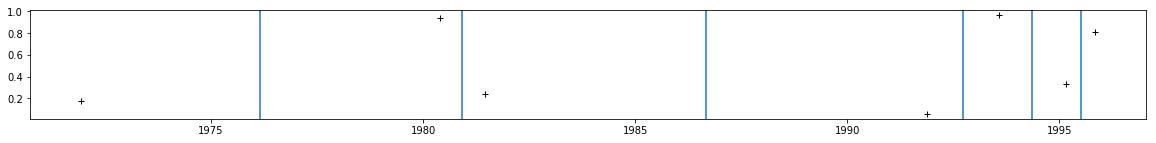

In [42]:
selected_values = values_sorted[(values_sorted>1970) & (values_sorted<=2000)]
splittingPlot(selected_values, 0.2)

number of groups: 6


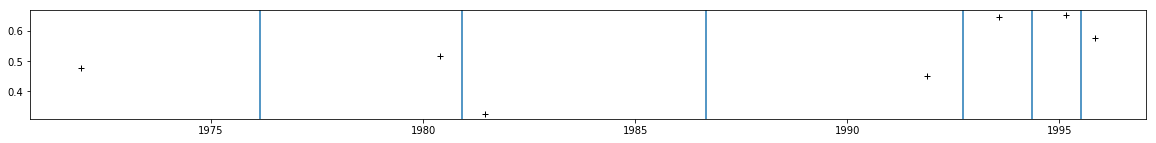

In [25]:
selected_values = values_sorted[(values_sorted>1970) & (values_sorted<=2000)]
splittingPlot(selected_values, 0.1)

number of groups: 6


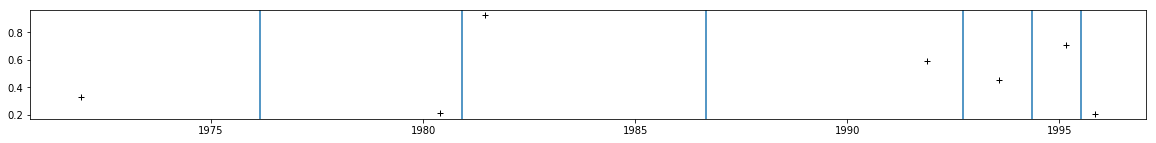

In [26]:
selected_values = values_sorted[(values_sorted>1970) & (values_sorted<=2000)]
splittingPlot(selected_values, 0.05)